# Preco de Medicamentos no Brasil

https://dados.gov.br/dados/conjuntos-dados/preco-de-medicamentos-no-brasil-consumidor

Os dados representam a lista de preços de Medicamentos , contemplando o preço Fábrica, ou preço fabricante (PF), que é o preço máximo que pode ser praticado pelas empresas produtoras ou importadoras do produto e pelas empresas distribuidoras. O PF indica o preço máximo permitido para venda a farmácias e drogarias e o Preço Máximo ao Consumidor (PMC) indica o preço teto de venda ao consumidor.

In [3]:
pip install pandas requests scipy matplotlib numpy seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.6 kB 465.5 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.6 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importar Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Realiza importacao do arquivo CSV. Validar sempre o caminho do arquivo em sua maquina local

In [40]:
df = pd.read_csv (r"C:\Users\Casa\Desktop\Projeto\medicamentos_anvisa.csv" , sep="," , encoding='UTF-8')

In [153]:
df.head()

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF Sem Impostos,PF 0%,...,PMC 20%,PMC 21%,PMC 22%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,TARJA
0,BUTILBROMETO DE ESCOPOLAMINA,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,BUSCOPAN,20 MG SOL INJ CT 5 AMP VD TRANS X 1 ML,A3A - ANTIESPASMÓDICOS E ANTICOLINÉRGICOS PUROS,Novo,Regulado,7.93,8.88,...,15.24,15.46,15.68,Não,Não,Não,Não,Negativa,Sim,Tarja Vermelha
1,DIPIRONA MONOIDRATADA/BUTILBROMETO DE ESCOPOLA...,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,BUSCOPAN COMPOSTO,"(4,0 + 500,0) MG/ML SOL INJ IV/IM CT 3 AMP VD ...",A3D - ASSOCIAÇÕES DE ANTIESPASMÓDICOS COM ANAL...,Novo,Regulado,11.00,12.32,...,21.15,21.45,21.75,Não,Não,Não,Não,Negativa,Sim,Tarja Vermelha
2,SULFATO DE MAGNÉSIO HEPTAIDRATADO,05.155.425/0001-93,VASCONCELOS INDUSTRIA FARMACEUTICA E COMERCIO ...,SULFATO DE MAGNÉSIO HEPTAHIDRATADO,10% SOL INJ IV CX 50 FR AMP VD TRANS X 50 ML,K4A2 - SOLUÇÕES ELETROLÍTICAS (>20ML E <100ML),Específico,Regulado,375.00,375.00,...,648.02,656.22,664.64,Não,Não,Não,Não,Positiva,Não,NaN
3,CIPIONATO DE TESTOSTERONA,00.923.140/0001-31,EMS SIGMA PHARMA LTDA,DEPOSTERON,100 MG/ML SOL INJ CX 3 AMP VD AMB X 2 ML,"G3B - ANDRÓGENOS EXCLUINDO G3E, G3F",Similar,Regulado,142.59,159.70,...,274.09,277.97,281.97,Não,Não,Não,Não,Negativa,Sim,Tarja Vermelha sob restrição
4,CLORIDRATO DE ESCETAMINA,51.780.468/0001-87,JANSSEN-CILAG FARMACÊUTICA LTDA,SPRAVATO,"140 MG/ML SOL SPR NAS CT FR VD TRANS X 0,2 ML ...",N6A9 - ANTIDEPRESSIVOS TODOS OS OUTROS,Novo,Regulado,1566.27,1754.22,...,NaN,NaN,NaN,Sim,Não,Não,Não,Negativa,Sim,Tarja Vermelha sob restrição


# Verifica o numero de celulas em branco em cada coluna


In [42]:
df.isna().sum()

SUBSTÂNCIA                                                  0
CNPJ                                                        0
LABORATÓRIO                                                 0
PRODUTO                                                     0
APRESENTAÇÃO                                                0
CLASSE TERAPÊUTICA                                          4
TIPO DE PRODUTO (STATUS DO PRODUTO)                       324
REGIME DE PREÇO                                             4
PF Sem Impostos                                             4
PF 0%                                                       4
PF 12%                                                    895
PF 17%                                                    895
PF 17% ALC                                                895
PF 17,5%                                                  895
PF 17,5% ALC                                              895
PF 18%                                                    895
PF 18% A

# Lista os 10 Laboratorios com maior variedade de medicamentos

In [43]:
df.value_counts('LABORATÓRIO').head(10)

LABORATÓRIO
EMS S/A                                            1709
ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A                1330
GERMED FARMACEUTICA LTDA                           1072
EUROFARMA LABORATÓRIOS S.A.                        1055
LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA          940
PRATI DONADUZZI & CIA LTDA                          904
SANOFI MEDLEY FARMACÊUTICA LTDA.                    868
GEOLAB INDÚSTRIA FARMACÊUTICA S/A                   767
CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA.     726
BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A     671
Name: count, dtype: int64

#  Divisao por tipo de produto,removendo campos vazios

In [137]:
tipo_medicamentos = medicamentos['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts(dropna=True).rename_axis('Tipo_Medicamento').reset_index(name='Quantidade')
tipo_medicamentos


,Tipo_Medicamento,Quantidade
0,Genérico,10511
1,Similar,9747
2,Novo,4179
3,Específico,2299
4,Biológico,1302
5,Fitoterápico,393
6,Produto de Terapia Avançada,41
7,Radiofármaco,1


#  Selecionar todos os produtos que possuem dipirona em sua substancia

In [146]:
df[df['PRODUTO'].str.contains("DIPIRONA")]


,SUBSTÂNCIA,CNPJ,LABORATÓRIO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF Sem Impostos,PF 0%,...,PMC 20%,PMC 21%,PMC 22%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,TARJA
3618,BUTILBROMETO DE ESCOPOLAMINA/DIPIRONA,57.507.378/0003-65,EMS S/A,BROMETO DE N-BUTIL ESCOPOLAMINA + DIPIRONA SO...,"6,67 MG/ML + 333,4 MG/ML SOL OR CT FR VD CGT ...",A3D - ASSOCIAÇÕES DE ANTIESPASMÓDICOS COM ANAL...,Genérico,Regulado,6.33,7.09,...,12.17,12.35,12.51,Não,Não,Não,Não,Negativa,Não,Tarja Vermelha (**)
3622,BUTILBROMETO DE ESCOPOLAMINA/DIPIRONA,19.570.720/0001-10,HIPOLABOR FARMACEUTICA LTDA,DIPIRONA MONOIDRATADA + BUTILBROMETO DE ESCOPO...,"(333,4 + 6,67) MG/ML SOL OR CT FR PLAS OPC GOT...",A3D - ASSOCIAÇÕES DE ANTIESPASMÓDICOS COM ANAL...,Genérico,Liberado,21.84,24.46,...,41.98,42.57,43.19,Não,Não,Não,Não,Negativa,Não,Sem Tarja
3686,CAFEÍNA ANIDRA/DIPIRONA,05.161.069/0001-10,BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A,DIPIRONA + CAFEÍNA,500 MG + 65 MG COM CT BL AL PLAS AMB X 100,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Liberado,84.74,94.91,...,162.89,165.19,167.58,Não,Não,Não,Não,Negativa,Sim,Sem Tarja
9533,CLORIDRATO DE PROMETAZINA/DIPIRONA/CLORIDRATO ...,73.856.593/0001-66,PRATI DONADUZZI & CIA LTDA,DIPIRONA SODICA + CLORIDRATO DE ADIFENINA + CL...,"5OO MG/1,5ML + 10MG/1,5ML +5MG/1,5ML SOL OR CT...",N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Liberado,17.50,19.60,...,33.64,34.11,34.61,Não,Não,Não,Não,Negativa,Não,Tarja Preta (**)
12618,DIPIRONA,57.507.378/0003-65,EMS S/A,DIPIRONA SÓDICA,50 MG/ML SOL OR CT FR VD AMB X 100 ML + COP,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Liberado,9.82,11.00,...,18.87,19.14,19.43,Não,Não,Não,Não,Negativa,Sim,Tarja Preta (**)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12862,DIPIRONA MONOIDRATADA/CAFEÍNA ANIDRA/CITRATO D...,57.507.378/0003-65,EMS S/A,CITRATO DE ORFENADRINA + DIPIRONA SÓDICA + CAF...,35 MG/ML + 300 MG/ML + 50 MG/ML SOL OR CT FR P...,M3B - RELAXANTE MUSCULAR DE AÇÃO CENTRAL,Genérico,Regulado,6.80,7.62,...,13.08,13.26,13.46,Não,Não,Não,Não,Negativa,Não,Tarja Vermelha (**)
12886,DIPIRONA MONOIDRATADA/DIPIRONA,65.271.900/0001-19,NATIVITA IND. COM. LTDA.,DIPIRONA SÓDICA,500 MG/ML SOL OR CT FR PLAS OPC GOT X 10 ML,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Liberado,4.45,4.98,...,8.55,8.67,8.79,Não,Não,Não,Não,Negativa,Sim,Tarja Preta (**)
12887,DIPIRONA MONOIDRATADA/DIPIRONA,65.271.900/0001-19,NATIVITA IND. COM. LTDA.,DIPIRONA SÓDICA,500 MG/ML SOL OR CT 200 FR PLAS OPC GOT X 10 ML,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Liberado,891.18,998.12,...,1713.00,1737.29,1762.29,Não,Não,Não,Não,Negativa,Não,Tarja Preta (**)
12888,DIPIRONA MONOIDRATADA/DIPIRONA,65.271.900/0001-19,NATIVITA IND. COM. LTDA.,DIPIRONA SÓDICA,500 MG/ML SOL OR CT FR PLAS OPC GOT X 20 ML,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Liberado,8.29,9.29,...,15.95,16.16,16.41,Não,Não,Não,Não,Negativa,Sim,Tarja Preta (**)


# Grafico da porcentagem dos medicamentos controlados

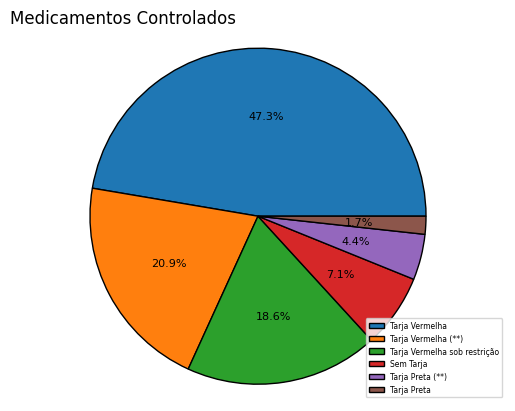

In [148]:
count = df["TARJA"].value_counts().values
classificacao = df["TARJA"].value_counts().index
plt.pie(count,autopct='%1.1f%%',  
          
        #colors = ["#fa3b3b", "#bf0b0b", "#fa0000", "#eeeeee", "#000000", "#444444"],
        labeldistance = 1.0,
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 8}, 
        )
plt.axis("equal")
plt.legend(fontsize=5.5, loc = 'lower right', labels=classificacao)
plt.title("Medicamentos Controlados" , loc='left')
plt.show()
